# DataCamp Certification Case Study

### Project Brief

A housing rental company has hired you for a new project. They are interested in developing an application to help people estimate the money they could earn renting out their living space.

The company has provided you with a dataset that includes details about each property rented, as well as the price charged per night. They want to avoid estimating prices that are more than 25 dollars off of the actual price, as this may discourage people.

You will need to present your findings to the head of rentals, who has no technical data science background.

The data you will use for this analysis can be accessed here: `"data/rentals.csv"`

In [191]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## I'M GOING TO USE THE MOST TYPICAL DATA SCIENCE PIPELINE. IT HAS 5 STEPS

## 1.Obtaining the data

## 2.Cleaning the data

## 3.Exploring and visualising the data

## 4.modelling the data

## 5.Interpreting the data

# 1.OBTAINING THE DATA

In [192]:
#reading the data into dataframe
df = pd.read_csv('./data/rentals.csv')
df.head()

,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
0,958,37.76931,-122.43386,Apartment,Entire home/apt,1.0,1.0,1,$170.00
1,3850,37.75402,-122.45805,House,Private room,1.0,1.0,1,$99.00
2,5858,37.74511,-122.42102,Apartment,Entire home/apt,1.0,2.0,30,$235.00
3,7918,37.76669,-122.45250,Apartment,Private room,4.0,1.0,32,$65.00
4,8142,37.76487,-122.45183,Apartment,Private room,4.0,1.0,32,$65.00


In [193]:
#No of rows and columns in the dataframe
df.shape

(8111, 9)

# 2.CLEANING THE DATA

In [194]:
#checking if there are any null values
df.isna().sum()

id                 0
latitude           0
longitude          0
property_type      0
room_type          0
bathrooms         12
bedrooms           4
minimum_nights     0
price              0
dtype: int64

Now we can see there are 12 null values in "bathrooms" and 4 null values in "bedrooms"

In [195]:
#dropping the null values
df.dropna(inplace=True)
df.isna().sum()

id                0
latitude          0
longitude         0
property_type     0
room_type         0
bathrooms         0
bedrooms          0
minimum_nights    0
price             0
dtype: int64

In [196]:
#checking the shape of the dataframe after dropping null values
df.shape

(8095, 9)

In [197]:
df.dtypes

id                  int64
latitude          float64
longitude         float64
property_type      object
room_type          object
bathrooms         float64
bedrooms          float64
minimum_nights      int64
price              object
dtype: object

In [198]:
#Now we change the datatype of column "price" from object to float64 using regular expression
df['price'] = df['price'].apply(lambda x: float(re.sub(r'\,|\$', '', x)))


In [199]:
#we dont need "id" because it makes no sense
df.drop(columns=['id'], inplace=True)

# 3A.EXPLORING THE DATA

In [200]:
# we want to explore every column of data and check what we need for our case study and rest can be dropped from the data
df.property_type.unique()

array(['Apartment', 'House', 'Condominium', 'Townhouse', 'Loft',
       'Guest suite', 'Cottage', 'Hostel', 'Guesthouse',
       'Serviced apartment', 'Bungalow', 'Bed and breakfast', 'Hotel',
       'Boutique hotel', 'Other', 'Tiny house', 'Resort', 'Villa',
       'Aparthotel', 'Castle', 'Camper/RV', 'In-law', 'Earth house',
       'Cabin', 'Dome house', 'Hut'], dtype=object)

In [201]:
_ = pd.DataFrame([
    df.property_type.value_counts(),
    round(df.property_type.value_counts(1) * 100, 2)
], ).T
_.columns = ['count', 'percentage']
_

,count,percentage
Apartment,3234.0,39.95
House,2313.0,28.57
Condominium,892.0,11.02
Guest suite,577.0,7.13
Boutique hotel,267.0,3.30
Hotel,157.0,1.94
Townhouse,142.0,1.75
Serviced apartment,121.0,1.49
Loft,88.0,1.09
Hostel,86.0,1.06


### anything less than 25 can be dropped and hotels, resorts and likewise should be dropped(according to our case study)


In [202]:
drop_list = [
    'Bed and breakfast', 'Hostel', 'Guesthouse', 'Serviced apartment',
    'Aparthotel', 'Guesthouse', 'Other', 'Bungalow', 'Hotel', 'Boutique hotel',
    'Other', 'Resort', 'Resort', 'Cottage', 'Villa', 'Castle', 'Cabin',
    'Tiny house', 'Earth house', 'Camper/RV', 'In-law', 'Hut', 'Dome house'
]


In [203]:
df = df[~df['property_type'].isin(drop_list)]
df.shape


(7246, 8)

In [204]:
df.property_type.unique()


array(['Apartment', 'House', 'Condominium', 'Townhouse', 'Loft',
       'Guest suite'], dtype=object)

In [205]:
df.room_type.unique()


array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [206]:
_ = pd.DataFrame([
    df.room_type.value_counts(),
    round(df.room_type.value_counts(1) * 100, 2)
]).T
_.columns = ['count', 'percentage']
_

,count,percentage
Entire home/apt,4598.0,63.46
Private room,2462.0,33.98
Shared room,186.0,2.57


In [207]:
df=df[~df.room_type.eq('Entire home/apt')]

In [208]:
df.room_type.unique()

array(['Private room', 'Shared room'], dtype=object)

In [209]:
df.bathrooms.unique()

array([1. , 4. , 3. , 2. , 0. , 2.5, 1.5, 0.5, 6.5, 5. , 3.5, 6. ])

In [210]:
df[df['bathrooms']>5]

,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
475,37.75950,-122.41839,House,Private room,6.5,1.0,32,64.0
3799,37.78945,-122.41923,House,Private room,6.0,1.0,30,57.0
5425,37.79139,-122.41775,House,Shared room,6.0,1.0,30,38.0
5494,37.75835,-122.41933,House,Private room,6.0,1.0,32,68.0
6850,37.79277,-122.42011,House,Shared room,6.0,1.0,30,37.0


In [211]:
df.bedrooms.unique()


array([1., 0., 3., 2., 4., 5.])

In [212]:
df[df['bedrooms']>4]


,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
7744,37.75463,-122.42196,Apartment,Private room,2.0,5.0,30,107.0


### Removal of Outlier 

In [213]:
df.price.value_counts(bins=10)


(-8.001, 800.0]     2632
(800.0, 1600.0]        8
(2400.0, 3200.0]       6
(4800.0, 5600.0]       1
(7200.0, 8000.0]       1
(1600.0, 2400.0]       0
(3200.0, 4000.0]       0
(4000.0, 4800.0]       0
(5600.0, 6400.0]       0
(6400.0, 7200.0]       0
Name: price, dtype: int64

In [214]:
before_removal= df.shape[0]

In [215]:
def find_outliers_IQR(data):
    """
    Use Tukey's Method of outlier removal AKA InterQuartile-Range Rule
    and return boolean series where True indicates it is an outlier.
    - Calculates the range between the 75% and 25% quartiles
    - Outliers fall outside upper and lower limits, using a treshold of  1.5*IQR the 75% and 25% quartiles.

    IQR Range Calculation:    
        res = df.describe()
        IQR = res['75%'] -  res['25%']
        lower_limit = res['25%'] - 1.5*IQR
        upper_limit = res['75%'] + 1.5*IQR

    Args:
        data (Series,or ndarray): data to test for outliers.

    Returns:
        [boolean Series]: A True/False for each row use to slice outliers.
        
    EXAMPLE USE: 
    >> idx_outs = find_outliers_df(df['AdjustedCompensation'])
    >> good_data = df[~idx_outs].copy()
    
    """
    df_b = data
    res = df_b.describe()

    IQR = res['75%'] - res['25%']
    lower_limit = res['25%'] - 1.5 * IQR
    upper_limit = res['75%'] + 1.5 * IQR

    idx_outs = (df_b > upper_limit) | (df_b < lower_limit)

    return idx_outs

In [216]:
df = df[~find_outliers_IQR(df.price)]

In [217]:
after_removal = df.shape[0]
data_loss = round(((after_removal - before_removal)/before_removal)*100,2)
print(data_loss)

-5.14


In [218]:
df = df[~find_outliers_IQR(df.minimum_nights)]

In [219]:
def describe_dataframe(df: pd.DataFrame()):
    """Statistical description of the pandas.DataFrame."""
    left = df.describe(include='all').round(2).T
    right = pd.DataFrame(df.dtypes)
    right.columns = ['dtype']
    ret_df = pd.merge(left=left,
                      right=right,
                      left_index=True,
                      right_index=True)
    na_df = pd.DataFrame(df.isna().sum())
    na_df.columns = ['nulls']
    ret_df = pd.merge(left=ret_df,
                      right=na_df,
                      left_index=True,
                      right_index=True)
    ret_df.fillna('', inplace=True)
    return ret_df


In [220]:
describe_dataframe(df)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtype,nulls
latitude,2496.0,,,,37.76,0.02,37.7,37.74,37.76,37.78,37.83,float64,0
longitude,2496.0,,,,-122.43,0.03,-122.51,-122.45,-122.43,-122.41,-122.37,float64,0
property_type,2496.0,6,House,1293,,,,,,,,object,0
room_type,2496.0,2,Private room,2318,,,,,,,,object,0
bathrooms,2496.0,,,,1.39,0.92,0.0,1.0,1.0,1.5,6.5,float64,0
bedrooms,2496.0,,,,1.03,0.27,0.0,1.0,1.0,1.0,5.0,float64,0
minimum_nights,2496.0,,,,12.91,14.09,1.0,1.0,3.0,30.0,60.0,int64,0
price,2496.0,,,,100.29,43.29,0.0,69.0,93.0,125.0,229.0,float64,0


In [221]:
df[df.minimum_nights>365]

,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price


In [222]:
#dropping properties that rents more than one year.
df = df[df.minimum_nights<=365]

In [223]:
df.head()

,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
1,37.75402,-122.45805,House,Private room,1.0,1.0,1,99.0
3,37.76669,-122.45250,Apartment,Private room,4.0,1.0,32,65.0
4,37.76487,-122.45183,Apartment,Private room,4.0,1.0,32,65.0
6,37.75919,-122.42237,Condominium,Private room,1.0,1.0,1,139.0
7,37.76259,-122.40543,House,Private room,1.0,1.0,1,135.0


# 3B.VISUALISING THE DATA

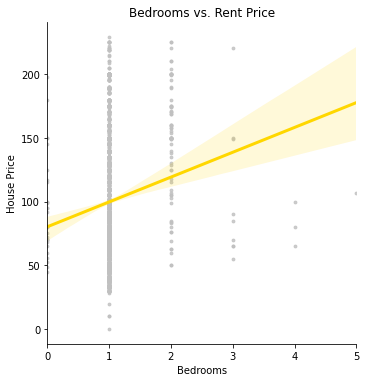

In [224]:
sns.lmplot(x='bedrooms', y='price',data=df, scatter_kws={
               "s": 8,
               "color": 'silver'
           },
           line_kws={
               'lw': 3,
               'color': 'gold'
           })
plt.xlabel("Bedrooms")
plt.ylabel("House Price")
plt.title("Bedrooms vs. Rent Price")
plt.show()

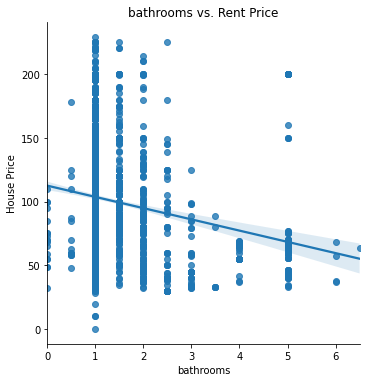

In [225]:
sns.lmplot(x='bathrooms', y='price',data=df)
plt.xlabel("bathrooms")
plt.ylabel("House Price")
plt.title("bathrooms vs. Rent Price")
plt.show()

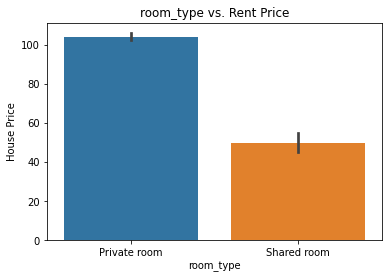

In [226]:
sns.barplot(x='room_type', y='price',data=df)
plt.xlabel("room_type")
plt.ylabel("House Price")
plt.title("room_type vs. Rent Price")
plt.show()


In [227]:
def heatmap_of_features_correlation(df, annot_format='.1f'):
    """
    Return a masked heatmap of the given DataFrame
    
    Parameters:
    ===========
    df            = pandas.DataFrame object.
    annot_format  = str, for formatting; default: '.1f'
    
    Example of `annot_format`:
    --------------------------
    .1e = scientific notation with 1 decimal point (standard form)
    .2f = 2 decimal places
    .3g = 3 significant figures
    .4% = percentage with 4 decimal places
    
    Note:
    =====
    Rounding error can happen if '.1f' is used.
    """
    with plt.style.context('dark_background'):
        plt.figure(figsize=(10, 10), facecolor='k')
        mask = np.triu(np.ones_like(df.corr(), dtype=bool))
        cmap = sns.diverging_palette(3, 3, as_cmap=True)
        ax = sns.heatmap(df.corr(),
                         mask=mask,
                         cmap=cmap,
                         annot=True,
                         fmt=annot_format,
                         linecolor='k',
                         annot_kws={"size": 9},
                         square=True,
                         linewidths=.5,
                         cbar_kws={"shrink": .5})
        plt.title(f'Features heatmap', fontdict={"size": 20})
        plt.show()
        return ax



        return list(feature_corr)


In [228]:
def drop_features_based_on_correlation(df, threshold=0.75):
    """
    Returns features with high collinearity.
    
    Parameters:
    ===========
    df = pandas.DataFrame; no default.
            data to work on.
    threshold = float; default: .75.
            Cut off value of check of collinearity.
    """
    # Set of all the names of correlated columns
    feature_corr = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # absolute coeff value
            if abs(corr_matrix.iloc[i, j]) > threshold:
                # getting the name of column
                colname = corr_matrix.columns[i]
                feature_corr.add(colname)
    if not feature_corr:
        print(f'No multicollinearity detected at {threshold*100}% threshold.')
    else:
        return list(feature_corr)

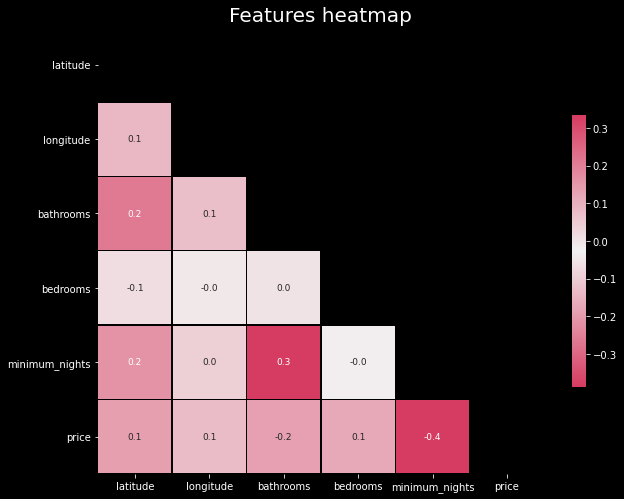

No multicollinearity detected at 75.0% threshold.


In [229]:
heatmap_of_features_correlation(df)
drop_features_based_on_correlation(df)

### Train and Test split

In [230]:
X = df.drop(columns='price').copy()
y = df.price.copy()

In [231]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)

In [232]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer

# isolating numerical cols
nume_col = list(X.select_dtypes('number').columns)
# isolating categorical cols
cate_col = list(X.select_dtypes('object').columns)
# pipeline for processing categorical features
pipe_cate = Pipeline([('ohe', OneHotEncoder(sparse=False, drop=None))])
# pipeline for processing numerical features
pipe_nume = Pipeline([('scaler', StandardScaler())])
# transformer
preprocessor = ColumnTransformer([('nume_feat', pipe_nume, nume_col),
                                  ('cate_feat', pipe_cate, cate_col)])
# creating dataframes
# X_train
X_train_pr = pd.DataFrame(preprocessor.fit_transform(X_train),
                          columns=nume_col +
                          list(preprocessor.named_transformers_['cate_feat'].
                               named_steps['ohe'].get_feature_names(cate_col)))
# X_test
X_test_pr = pd.DataFrame(preprocessor.transform(X_test),
                         columns=nume_col +
                         list(preprocessor.named_transformers_['cate_feat'].
                              named_steps['ohe'].get_feature_names(cate_col)))


In [233]:
X_train_pr

,latitude,longitude,bathrooms,bedrooms,minimum_nights,property_type_Apartment,property_type_Condominium,property_type_Guest suite,property_type_House,property_type_Loft,property_type_Townhouse,room_type_Private room,room_type_Shared room
0,-0.763871,0.679836,-0.416783,-0.116157,1.230090,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.301849,0.308925,0.124465,-0.116157,1.230090,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.184372,1.222894,-0.416783,-0.116157,-0.830765,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.805259,-0.016011,-0.416783,-0.116157,-0.688637,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.418373,-0.488206,-0.416783,-0.116157,-0.759701,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,0.160587,-1.201337,-0.416783,-0.116157,1.230090,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1992,-1.016260,0.514257,-0.416783,-0.116157,-0.759701,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1993,-1.531001,0.130555,-0.416783,-0.116157,-0.546509,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1994,1.409664,0.507343,3.913206,-0.116157,1.230090,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [234]:
y_train


1932    140.0
2060     48.0
5978    150.0
1705    158.0
3454    150.0
        ...  
2431    120.0
2344    130.0
1529     60.0
5079    150.0
950     130.0
Name: price, Length: 1996, dtype: float64

# 4.MODELLING THE DATA

### 1.DummyRegressor

In [235]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train_pr, y_train)

y_pred_dummy = dummy_regr.predict(X_test_pr)

print("MAE :", mean_absolute_error(y_test, y_pred_dummy))
print("r2 :", r2_score(y_test, y_pred_dummy))

MAE : 34.5650621242485
r2 : -0.00019036777256786763


### 2.LinearRegression

In [236]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(n_jobs=-1)
reg.fit(X_train_pr, y_train)

y_pred_reg = reg.predict(X_test_pr)

print("Coefs :\n", reg.coef_)

mae = (abs(y_test - y_pred_reg)).mean()
print("MAE :", mae)
print("r2 :", r2_score(y_test, y_pred_reg))

Coefs :
 [ 10.31386679   3.43833245  -2.11596493   5.90310636 -14.42251606
  -9.73218152   2.05717355   3.73575622 -10.91831278  20.88861122
  -6.0310467   19.63700058 -19.63700058]
MAE : 27.39635296836451
r2 : 0.31122001972451396


### 3.RandomForestRegressor

In [237]:
from sklearn.ensemble import RandomForestRegressor

def model_stat(y_test, y_pred):
    print(' MAE:', mean_absolute_error(y_test, y_pred), '\n', 'MSE:',
          mean_squared_error(y_test, y_pred), '\n', 'RMSE:',
          np.sqrt(mean_squared_error(y_test, y_pred)), '\n', 'r2:',
          r2_score(y_test, y_pred))
    
rf_reg = RandomForestRegressor(n_estimators=200,
                               criterion='mae',
                               n_jobs=-1)
rf_reg.fit(X_train_pr, y_train)
y_pred_rf = rf_reg.predict(X_test_pr)
model_stat(y_test, y_pred_rf)

 MAE: 22.681399999999996 
 MSE: 997.6930195499999 
 RMSE: 31.586278976004753 
 r2: 0.4586592128468985


### 4.GridSearch

In [238]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 60, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# oob_score=[True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
#                'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap,
#               'oob_score': oob_score
              }
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [239]:
from sklearn.model_selection import RandomizedSearchCV
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(criterion='mae')
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf,
                               param_distributions=random_grid,
                               n_iter=50,
                               cv=2,
                               verbose=2,
                               scoring ='neg_mean_absolute_error',
                               random_state=42,
                               n_jobs=-1)
# Fit the random search model
rf_random.fit(X_train_pr, y_train)

print(rf_random.best_params_)

Fitting 2 folds for each of 50 candidates, totalling 100 fits
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto'}


### 5.BestparameterswithRandomForestRegressor

In [240]:
rf_reg = RandomForestRegressor(n_estimators=1000,
                               criterion='mae',
                               min_samples_split=2,
                               min_samples_leaf=1,
                               max_features='sqrt',
                               max_depth=20,
                               bootstrap=False,
#                                oob_score=True,
                               n_jobs=-1)
rf_reg.fit(X_train_pr, y_train)
y_pred_rf = rf_reg.predict(X_test_pr)

In [241]:
model_stat(y_test, y_pred_rf)

 MAE: 22.441217 
 MSE: 1045.0549239225002 
 RMSE: 32.32730925892998 
 r2: 0.43296099697119417


<AxesSubplot:xlabel='price', ylabel='price'>

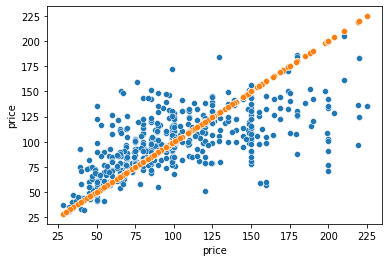

In [242]:
sns.scatterplot(x=y_test, y=y_pred_rf)
sns.scatterplot(x=y_test, y=y_test)

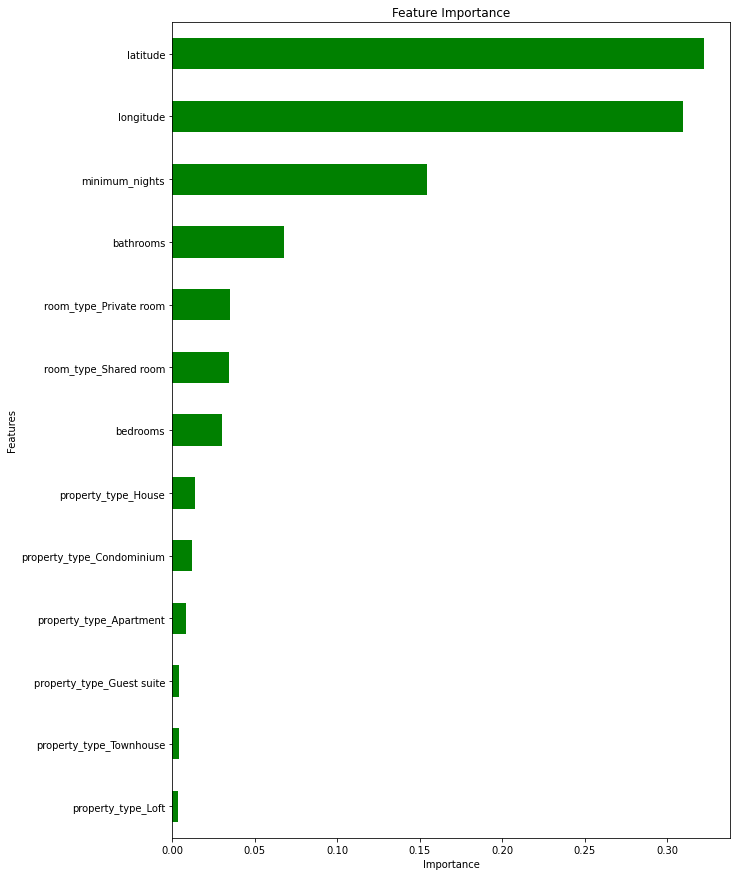

In [243]:
rf_feat_imp = pd.DataFrame(rf_reg.feature_importances_, index=X_train_pr.columns)
rf_feat_imp.sort_values(by=0).plot(kind='barh', legend='', figsize=(10,15), title='Feature Importance', color = 'g')
plt.ylabel('Features')
plt.xlabel('Importance')
plt.show()

In [244]:
#SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions 
import shap
shap.initjs()

In [245]:
explainer = shap.TreeExplainer(rf_reg)
shap_values = explainer.shap_values(X_test_pr)

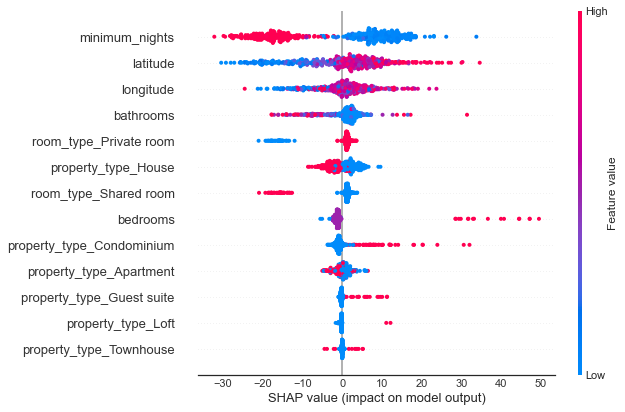

In [246]:
with plt.style.context('seaborn-white'):
    shap.summary_plot(shap_values, X_test_pr)

### 6.XGBRegressor

In [247]:
from xgboost import XGBRegressor, XGBRFRegressor
xgb_reg = XGBRegressor(learning_rate=0.1,
                       n_estimators=100,
#                        min_samples_split=2,
#                        min_samples_leaf=1,
#                        max_depth=3,
                       n_jobs=-1,
#                        subsample=1.0,
                       verbosity =1, 
                       booster='gbtree',# gbtree, gblinear or dart
                       objective ='reg:squarederror',
                       random_state=2021)

In [248]:
xgb_reg.fit(X_train_pr, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1,
             random_state=2021, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=1)

In [249]:
y_pred_xgb = xgb_reg.predict(X_test_pr)


In [250]:
model_stat(y_test, y_pred_xgb)

 MAE: 25.332040046691894 
 MSE: 1157.560316587929 
 RMSE: 34.0229380945845 
 r2: 0.3719164104791064


### 7.SupportVectorMachine

In [251]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear', C=1)
regressor.fit(X_train_pr, y_train)
y_pred_svr = regressor.predict(X_test_pr)
model_stat(y_test, y_pred_svr)

 MAE: 26.597757070194742 
 MSE: 1367.0470559358318 
 RMSE: 36.973599445223506 
 r2: 0.25825046899754744
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.0s
[CV] END max_features=auto, min_samples_l

# 5.INTERPRETING THE DATA

### bEST MoDEL

### Among all the models tested, the "random forest model" produces the best results and has the smallest mean absolute error.

# CONCLUSION

#### 1. The location of your property does have an impact on rental income.
#### 2. In the near run, location is the most important factor in determining rental pricing.
#### 3. Condo owners might anticipate a boost in rental income.
#### 4. If your property is closer to the city's center, you can charge more.

# FUTURE WORK

#### 1. To assess quality, add demographic information to the model, such as area attractions, restaurants, income level, local transportation,         year built information, or refurbishment information.
#### 2. Tweaking of hyperparameters
#### 3. Add Features of the house.